# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
list_s = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [9]:
def mean(list_s):
  j = 0
  for i in list_s:
    j = j + i
  j = j/len(list_s)
  j = int(j)
  return j

mean(list_s)

3052

In [0]:
j = mean(list_s)

In [11]:
def variance(list_s):
  meanval = mean(list_s)
  # print(meanval)
  lenght = len(list_s)
  sumAll=0.0
  for a in list_s:
    # print(a)
    x = a - meanval #Xi-Xm
    y = x**2
    sumAll = sumAll+y
  return(sumAll/lenght)
  return variance(list_s)
variance(list_s)

183761.57142857142

In [13]:
def std_dev(l):
  j = variance(l)
  j = j**(1/2)
  print(j)

std_dev(list_s)

428.67420196294927


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
s = [127, 80, 105, 92, 120, 115, 93] 

In [16]:
import numpy as np
np.cov(list_s, s)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [17]:
np.std(s)

15.792015549069118

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd


In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [0]:
import seaborn as sns

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [21]:
a = [0, 5]
b = [5, 0]
a = np.array(a)
b = np.array(b)
print(a, b)
# orthogonal is perpendicular but in 3d

[0 5] [5 0]


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [22]:
z = ([-5],
     [3],
     [7])

t = ([6],
     [-8],
     [2])

vector = np.array([[0,0,0,
                    z[0], z[1], z[2]]])

X, Y, Z, U, V, W = zip(*vector)

vector1 = np.array([[0,0,0,
                    z[0], z[1], z[2]]])

q, e, r, t, i, o = zip(*vector1)

vector

array([[0, 0, 0, list([-5]), list([3]), list([7])]], dtype=object)

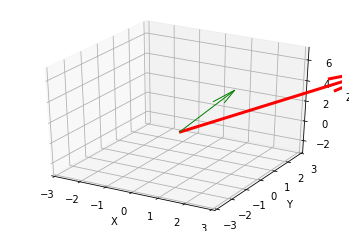

In [71]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 7])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.quiver(q, e, r, t, i, o, linewidth=3, color='red')
ax.quiver(X, Y, Z, U, V, W, linewidth=1, color='green')
plt.show()

Those values are not orthagonal.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [24]:
c = ([2, -15, 6, 20])
c = np.array(c)
c

array([  2, -15,   6,  20])

In [25]:

norm_c = np.linalg.norm(c)
norm_c


25.787593916455254

In [26]:
np.dot(c, c)

665

In [27]:
v = np.matmul(c.T, c)
v

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$$d = \begin{bmatrix}7 \\ 12\end{bmatrix}$$




$$e = \begin{bmatrix}2 \\ 11 \\ -8\end{bmatrix}$$

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = [4, 12, 11, 9, 2]

In [29]:
f_unit = f/np.linalg.norm(f)
f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [53]:
vect1_ind = [1, 2]
vect2_ind = [3, 8]
print(vect1_ind, vect2_ind)

[1, 2] [3, 8]


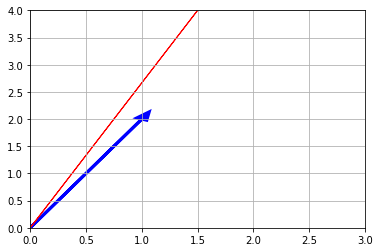

In [54]:
fig, ax = plt.subplots()
ax.grid()

plt.xlim(0, 3)
plt.ylim(0, 4)
plt.arrow(0, 0, 
          vect1_ind[0], 
          vect1_ind[1], 
          linewidth=3, 
          head_width=.1,
          color = 'blue')

plt.xlim(0, 3)
plt.ylim(0, 4)
plt.arrow(0, 0, 
          vect2_ind[0], 
          vect2_ind[1], 
          linewidth=1, 
          head_width=.1,
          color = 'red')
plt.show()

In [57]:
vect1_dep = [1, 2]
vect2_dep = [2, 4]
print(vect1_dep, vect2_dep)

[1, 2] [2, 4]


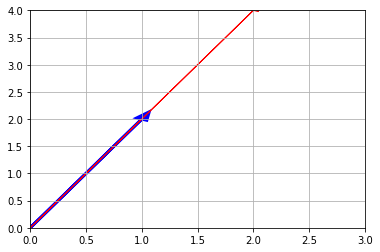

In [59]:
fig, ax = plt.subplots()
ax.grid()

plt.xlim(0, 3)
plt.ylim(0, 4)
plt.arrow(0, 0, 
          vect1_dep[0], 
          vect1_dep[1], 
          linewidth=3, 
          head_width=.1,
          color = 'blue')

plt.xlim(0, 3)
plt.ylim(0, 4)
plt.arrow(0, 0, 
          vect2_dep[0], 
          vect2_dep[1], 
          linewidth=1, 
          head_width=.1,
          color = 'red')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [61]:
g = [1, 2]
h = [4, 8]
print(g, h)

[1, 2] [4, 8]


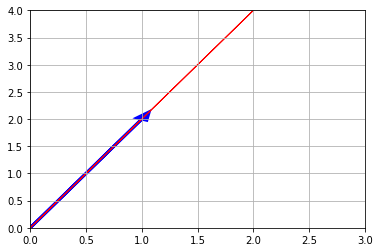

In [62]:
fig, ax = plt.subplots()
ax.grid()

plt.xlim(0, 3)
plt.ylim(0, 4)
plt.arrow(0, 0, 
          g[0], 
          g[1], 
          linewidth=3, 
          head_width=.1,
          color = 'blue')

plt.xlim(0, 3)
plt.ylim(0, 4)
plt.arrow(0, 0, 
          h[0], 
          h[1], 
          linewidth=1, 
          head_width=.1,
          color = 'red')
plt.show()

The span is 0 since they are the same line

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]

In [72]:


vectorm = np.array([[0,0,0,
                    l[0], l[1], l[2]]])

X, Y, Z, U, V, W = zip(*vectorl)

vectorm = np.array([[0,0,0,
                    m[0], m[1], m[2]]])

q, e, r, t, i, o = zip(*vectorm)

vectorn = np.array([[0,0,0,
                    n[0], n[1], n[2]]])

a, b, c, d, k, f = zip(*vectorn)
vector

array([[0, 0, 0, list([-5]), list([3]), list([7])]], dtype=object)

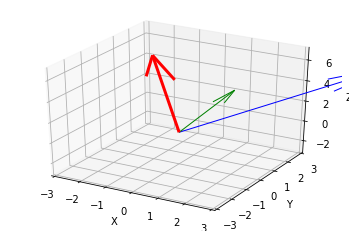

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 7])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.quiver(q, e, r, t, i, o, linewidth=3, color='red')
ax.quiver(X, Y, Z, U, V, W, linewidth=1, color='green')
ax.quiver(a, b, c, d, k, f, linewidth=1, color='blue')


plt.show()

The span is infinite since the lines are not the same

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [78]:
a = [1, 0]
b = [0, 1]
print(a, b)

[1, 0] [0, 1]


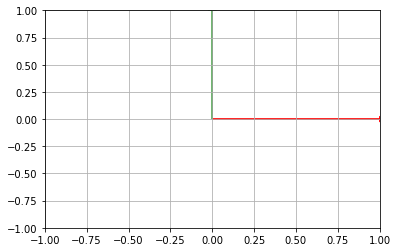

In [83]:
plt.arrow(0,0, a[0], a[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, b[0], b[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,1)          
plt.ylim(-1,1)
plt.grid(True)
plt.show()

## 6.2 What does it mean to form a basis?

Any set of vectors that goes through row reduction to form a orthagonal line like that obove graph is considered a basis.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [75]:
p = ([1, 2, 3],
     [-1, 0, 7],
     [4, 8, 2])
p

([1, 2, 3], [-1, 0, 7], [4, 8, 2])

In [77]:
p = np.linalg.matrix_rank(p)
p

3

The Rank of P is 3

## 7.2 What does the rank of a matrix tell us?

Rank tells us what the number of independent vectors are.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

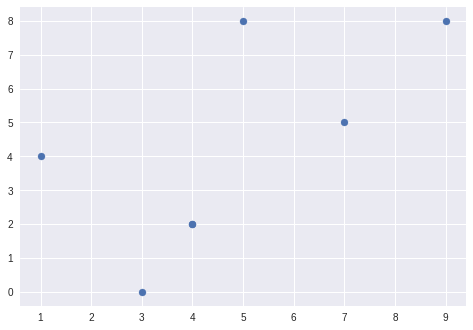

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()